## Import important libraries

In [50]:
import matplotlib.pyplot as plt # For data visualization
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

## Load the Fashion MNIST dataset and split it

In [33]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualize some images with their corresponding labels for reference.

In [35]:
labels=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

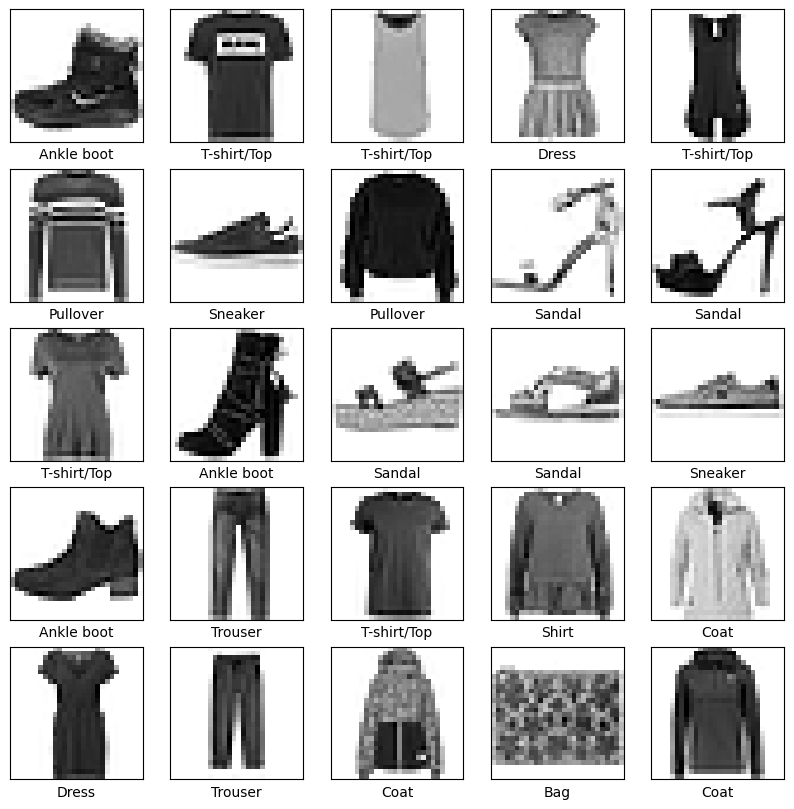

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])# Remove x-axis tick marks for a cleaner look
  plt.yticks([])# Remove y-axis tick marks
  plt.grid(False)# Turn off the grid
  plt.imshow(X_train[i],cmap=plt.cm.binary)# Display the image in grayscale
  plt.xlabel(labels[y_train[i]])# Label the image with its class name
plt.show()

## Normalize the data

In [37]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [38]:
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


## Split the data to 80% train and 20% validation

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Flatten images into 1D vectors

In [40]:
X_train = X_train.reshape(-1, 28 * 28)
X_val = X_val.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

## The ANN Model

In [41]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([   # Initialize a Sequential model
    Dense(512, activation='relu', input_shape=(784,)),# First dense layer with 512 neurons
    BatchNormalization(),# Normalize outputs to stabilize and speed up training
    Dropout(0.2), # Drop 20% of neurons to prevent overfitting
    Dense(256, activation='relu'),# Second dense layer with 256 neurons
    BatchNormalization(),# Apply batch normalization to improve training stability and speed by normalizing the outputs of each layer to have a mean of zero and a standard deviation of one
    Dropout(0.2),# Drop 20% of neurons again
    Dense(128, activation='relu'),# Third dense layer with 128 neurons
    BatchNormalization(),
    Dense(10, activation='softmax')# Output layer with 10 neurons for 10 classes, using softmax for probabilities
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [42]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), # Use Adam optimizer with a learning rate of 0.001
              loss='sparse_categorical_crossentropy',  # Set loss function for multi-class classification with integer labels
              metrics=['accuracy'])# Track accuracy during training


## Early stopping and  learning rate scheduler
- Early Stopping: To stop training if the validation accuracy doesn't improve.
- ReduceLROnPlateau: adjusts the learning rate dynamically based on model performance

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6) #reduces the learning rate by half after patience=3 epochs with no improvement, until a minimum learning rate of 1e-6 is reached.


## Training the Model

In [44]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr],
                    batch_size=128)#indicates that 128 samples from the training dataset will be processed together before the model’s weights are updated.

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7743 - loss: 0.6507 - val_accuracy: 0.8468 - val_loss: 0.4174 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8564 - loss: 0.3955 - val_accuracy: 0.8555 - val_loss: 0.4030 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8646 - loss: 0.3674 - val_accuracy: 0.8648 - val_loss: 0.3599 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8729 - loss: 0.3443 - val_accuracy: 0.8480 - val_loss: 0.4191 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8751 - loss: 0.3373 - val_accuracy: 0.8692 - val_loss: 0.3531 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8809 - loss: 0.3165 - val_accuracy: 0.8757 - val_loss: 0.3417 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8874 - loss

## Evaluate the Model on Test Data

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8973 - loss: 0.3154
Test Accuracy: 89.63%


## Classification Report and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.83      0.83      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.83      0.80      0.82      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.71      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



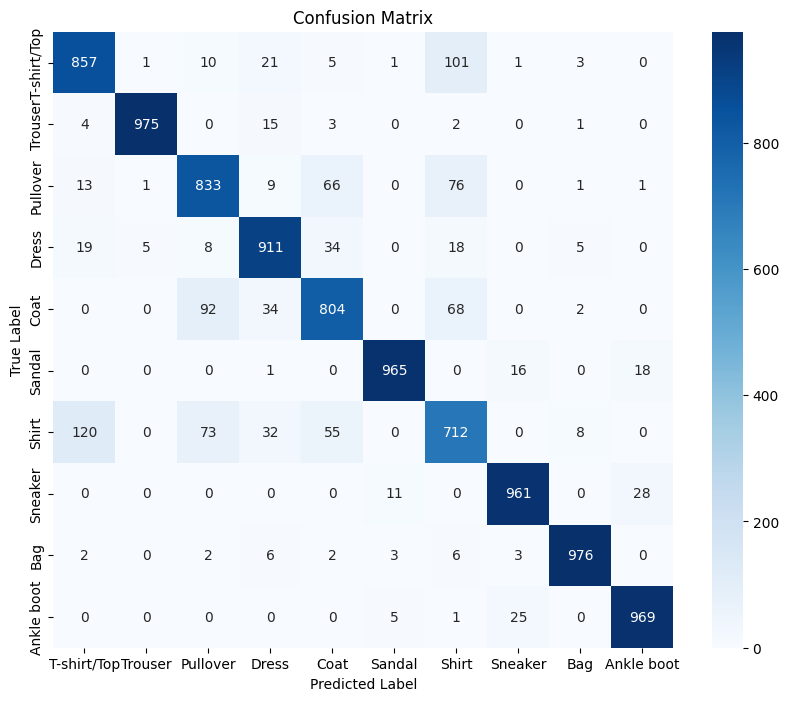

In [46]:
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(y_test, y_pred, target_names=labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with correctly aligned values
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Plotting training and validation accuracy and loss

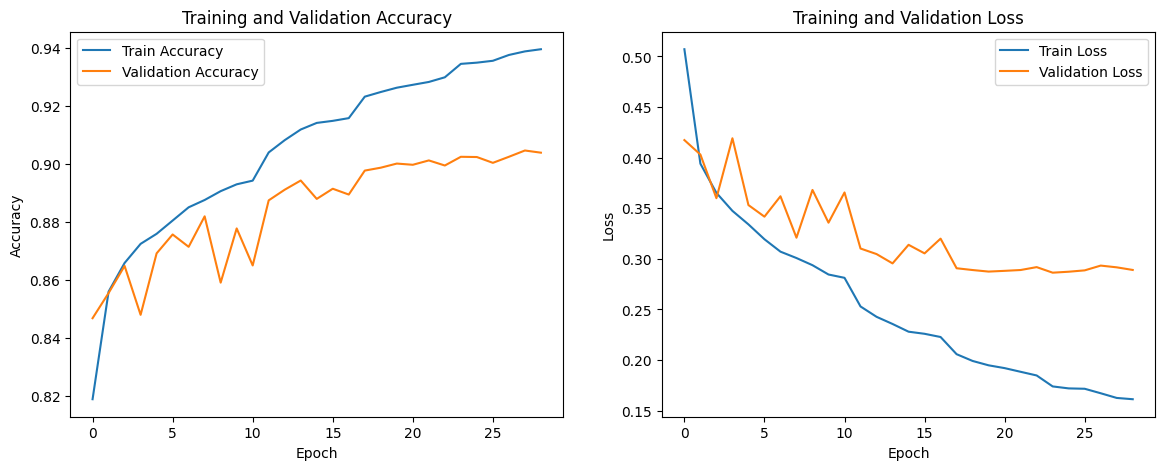

In [47]:
# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


## Bar Plot for Precision, Recall, F1-Score

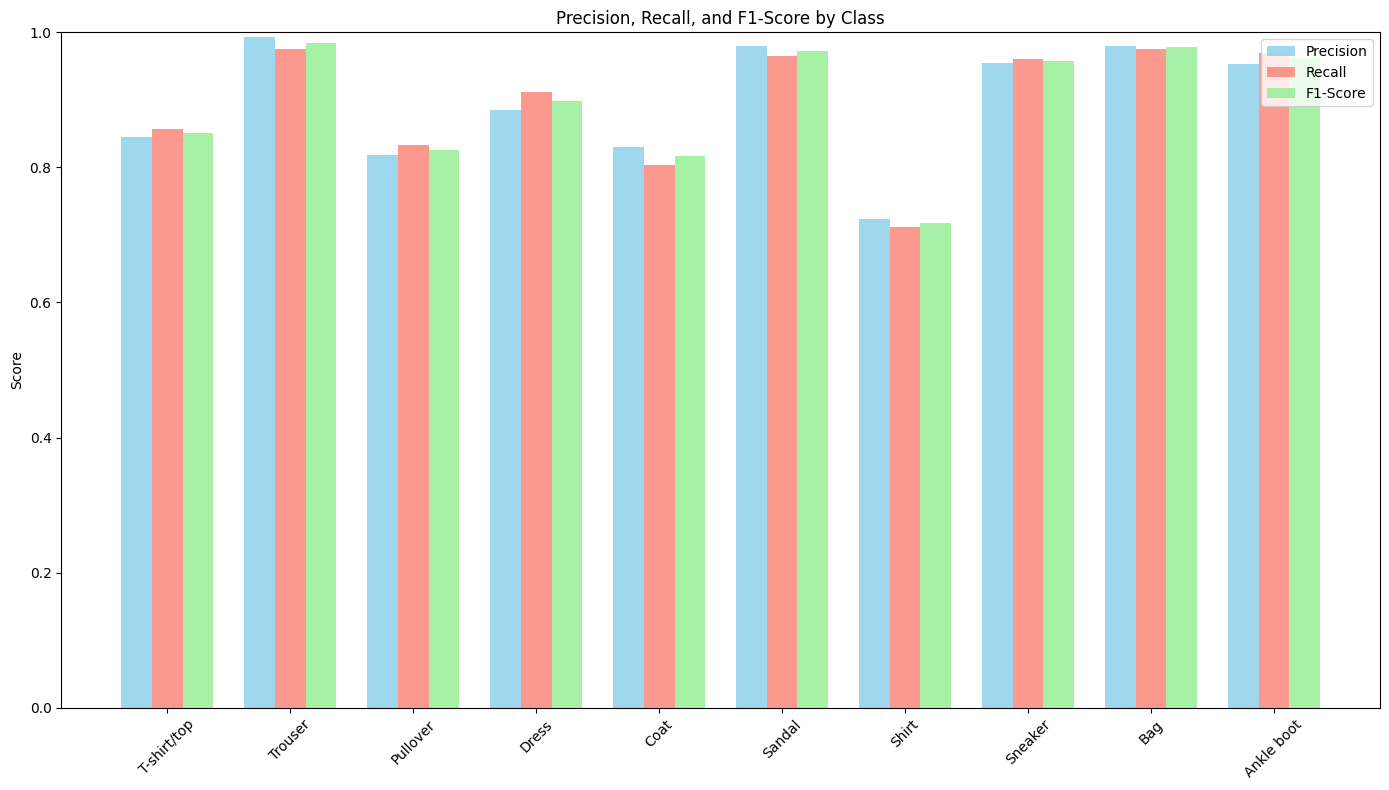

In [51]:
# Calculate precision, recall, and F1 scores
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Define metric values and colors for better clarity
metrics = [precision, recall, f1]
metric_names = ["Precision", "Recall", "F1-Score"]
colors = ['skyblue', 'salmon', 'lightgreen']
x = np.arange(len(labels))  # label locations

# Set bar width and positions for grouped bars
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 8))

# Plot grouped bars
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * bar_width, metric, width=bar_width, color=color, label=metric_names[i], alpha=0.8)

# Labeling
ax.set_xticks(x + bar_width)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.legend(loc="upper right")
plt.ylim(0, 1)  # Assuming scores are between 0 and 1 for interpretability

plt.tight_layout()
plt.show()